In [2]:
import MCEq.particlemanager as pman
import MCEq.data as data
import mceq_config as config
import matplotlib.pyplot as plt
import numpy as np

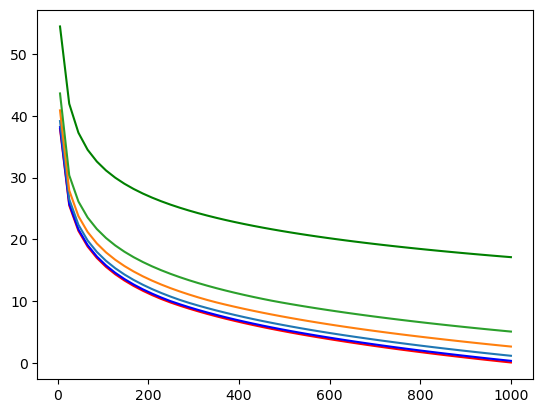

In [3]:
from MCEq.geometry.density_profiles import CorsikaAtmosphere
cka_obj = CorsikaAtmosphere('SouthPole', 'December')

xv = []
fxv = []
th_ar = [0.0, 15.0, 30.0, 45.0, 60.0, 90.0]
xv = np.linspace(5, 1000, num=50, endpoint=True)

for theta in th_ar:
    cka_obj.set_theta(theta)
    xv = np.linspace(5, 1000, num=50, endpoint=True)
    fx = np.array([cka_obj.X2h(x)/1e5 for x in xv])
    fxv.append(fx)

plt.plot(xv, fxv[0], color = 'r')
plt.plot(xv, fxv[1], color = 'b')
plt.plot(xv, fxv[2])
plt.plot(xv, fxv[3])
plt.plot(xv, fxv[4])
plt.plot(xv, fxv[5], color = 'g')

# set_theta(0.0)
# cka_obj.X2h(1)

In [4]:

config.adv_set["no_mixing"] = True


hdf5_back = data.HDF5Backend()
ics = data.InteractionCrossSections(hdf5_back)
# print(ff)
proton = pman.MCEqParticle(
    pdg_id=2212, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
pion = pman.MCEqParticle(
    pdg_id=211, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
# part._calculate_mixing_energy()
# inter = data.Interactions(data.HDF5Backend())
# part.set_cs(ics)


/tmp/ipykernel_3754898/4056511921.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())


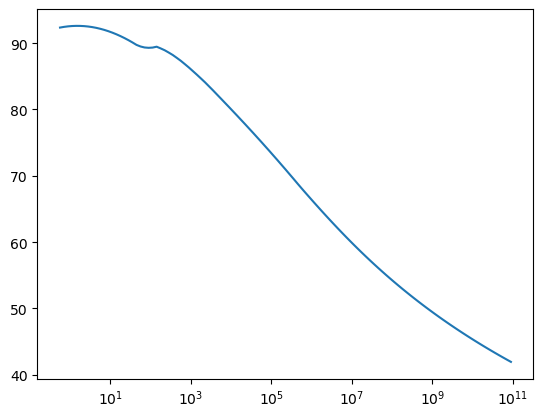

In [5]:
plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())
# plt.semilogx(hdf5_back.energy_grid.c, 1/pion.inverse_interaction_length())


In [9]:
import random
import numpy as np
import boost_histogram as bh


hist = bh.Histogram(bh.axis.Regular(bins=30, start=0, stop=100))

# z = random.random()
# * 1/proton.inverse_interaction_length()[80]

from MCEq.geometry.density_profiles import CorsikaAtmosphere
cka_obj = CorsikaAtmosphere('SouthPole', 'December')

cka_obj.set_theta(90.0)


# cka_obj.X2h(x)

def rand_length(i): 
    x = -np.log(1-random.random())/proton.inverse_interaction_length()[i]
    return cka_obj.X2h(x)/1e5
rand_length(10)

42.556741972783364

In [49]:


# def rand_length(): 
#     xsum = 0
#     for i in range(30):
#         # xsum += random.random()
#         xsum += -np.log(1-random.random())*(i + 1)**4
#     return xsum

Xavg = 1/proton.inverse_interaction_length()[30]
en = hdf5_back.energy_grid.c[30]
print(f"H = {cka_obj.X2h(Xavg)/1e5},X = {Xavg}, E = {en}")

# x = np.array([rand_length(30) for _ in range(100000)])

def length_dist(ind):
    res = np.array([rand_length(ind) for _ in range(100000)])
    return res
    
 
# hist.view() 
# hist.
# plt.hi
# hist.axes.centers
# plt.hist(hist.axes.centers, hist.view())
# plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)

# bins, counts = np.histogram(length_dist(30), 100)
eind = [11, 31, 61, 101]
hists = []
ees = []
avh = []
for i in eind:
    hists.append(np.histogram(length_dist(i), 100))
    ees.append(hdf5_back.energy_grid.c[i])
    avh.append(cka_obj.X2h(1/proton.inverse_interaction_length()[i])/1e5)


H = 32.36846331463974,X = 89.30271109403324, E = 89.12509381337459


In [47]:
ii = 9
Xavg = 1/proton.inverse_interaction_length()[ii]
en = hdf5_back.energy_grid.c[ii]
print(f"H = {cka_obj.X2h(Xavg)/1e5},X = {Xavg}, E = {en}")

H = 32.12900680775324,X = 92.46053703303416, E = 0.707945784384138


In [40]:
import math

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

(0.0, 80.0)

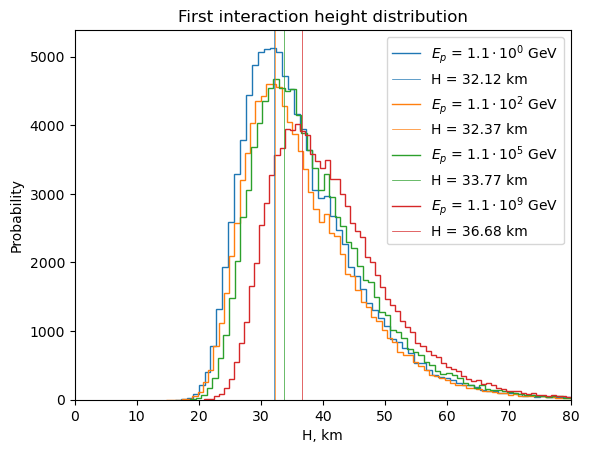

In [60]:

# for i in range(len(eind)):
#     plt.stairs(*hists[i], label=f"E = {ees[i]:.1e} GeV")
ep = r"$E_p$" 
for i in range(len(eind)):
    pp = plt.stairs(*hists[i], label=f"{ep} = {sci_notation(ees[i])} GeV")
    # pp.get_edgecolor
    plt.axvline(x = avh[i],linewidth = 0.5, color = pp.get_edgecolor(), label = f'H = {avh[i]:0.2f} km') 
# plt.axvline(x = 40, color = 'b', label = 'axvline - full height')    
plt.legend()
plt.xlabel('H, km')
plt.ylabel('Probability')
plt.title('First interaction height distribution')
plt.xlim(0, 80)
# plt.ylim(0, 0.03)
# plt.grid(True)


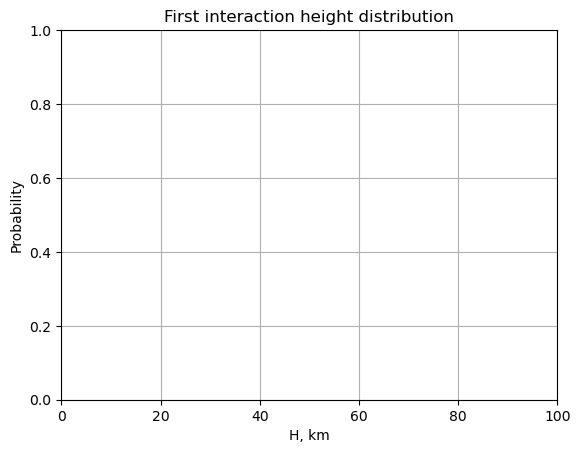

In [18]:
plt.xlabel('H, km')
plt.ylabel('Probability')
plt.title('First interaction height distribution')
plt.xlim(0, 100)
# plt.ylim(0, 0.03)
plt.grid(True)
# fig()
# mesh = ax.pcolormesh(*hist.axes.edges.T, density.T)
# fig.colorbar(mesh)
# plt.savefig("simple_density.png")

# plt.semilogy(np.linspace(0,len(hdf5_back.energy_grid.c)),hdf5_back.energy_grid.c)

In [1]:
import impy
from impy.constants import TeV



ekin = impy.kinematics.CenterOfMass(10, "proton", "proton")
gen = impy.models.Sibyll23d(ekin)



 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

359.03268389323034
 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [1]:

import impy
import random
import numpy as np
import dataclasses
import math


@dataclasses.dataclass
class ShowerParticle:
    id : int
    parent_id : int
    interacted : bool
    pid : int
    energy : float
    xlength : float
    
    

class ShowerGenerator():
    
    mbarn_in_cm2 = 1e-27
    proton_mass_g = 1.672621e-24
    mass_barn = proton_mass_g/mbarn_in_cm2
    id_in_shower = 0
    
    def __init__(self):
        ekin = impy.kinematics.FixedTarget(10, "proton", (14, 7))
        self.gen = impy.models.Sibyll23d(ekin)
        self._set_average_A(14)
        
    def _set_average_A(self, A):
        self.average_A = A
        self.factor_sigma = A*self.mass_barn
    
    def get_average_xlength(self, pid, energy):
        self.gen.event_kinematics = impy.kinematics.FixedTarget(energy, int(pid), (14, 7))
        try:
            sigma = 1 / self.gen.sigma_inel_air()
        except:
            sigma = None
        return self.factor_sigma * sigma
    
    def get_xlength(self, pid, energy):
        xlen = self.get_average_xlength(pid, energy)
        return -np.log(1-random.random())*xlen
    
    def get_generation(self, shower_particle):
        xlength = self.get_xlength(shower_particle.pid, shower_particle.energy)
        shower_particle.id = self.id_in_shower
        shower_particle.interacted = True
        
        if not xlength or math.isnan(xlength):
            shower_particle.interacted = False
            generation = dict()
            generation[shower_particle.id] = shower_particle
            return generation
            
        xlength += shower_particle.xlength
        event = next(self.gen(1)).final_state()
        
        
        generation = dict()
        
        for i in range(len(event)):
            ev = event[i]
            self.id_in_shower += 1
            sp = ShowerParticle(self.id_in_shower
                                , shower_particle.id
                                , False
                                , ev.pid
                                , ev.en
                                , xlength)
            generation[sp.id] = sp
        
        return generation

    
shower_generator = ShowerGenerator()        

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [2]:

initial_particle = ShowerParticle(0, 0, False, 2212, 1000, 0)

stack_old = dict()
stack_old.update({initial_particle.id : initial_particle})
current_stack = shower_generator.get_generation(initial_particle)

In [3]:

stack_new = dict()

for spart in current_stack.values():
    print(spart.id)
    stack_new.update(shower_generator.get_generation(spart))
    stack_old.update({spart.id : spart})
    

1
2
3
4
  CUT_PRO:  low sqrt(s)    8.2065507142756733     
  CUT_PRO:  low sqrt(s)    8.2065507142756733     
impy.models.sibyll.Sibyll23d::sigma_inel_air(): No cross section available for projectile 111


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'